<a href="https://colab.research.google.com/github/aaryachinnawar/Calculator-website/blob/main/PRAC_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

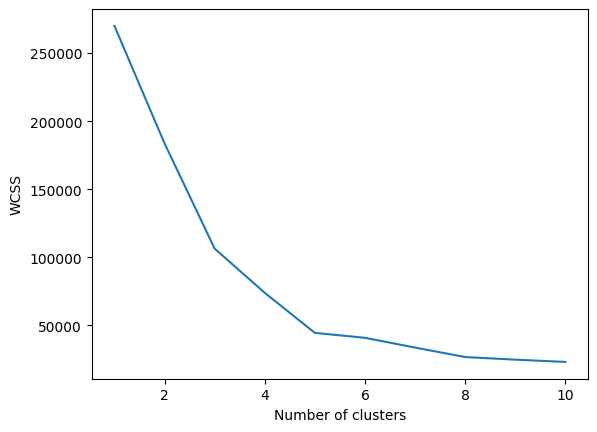

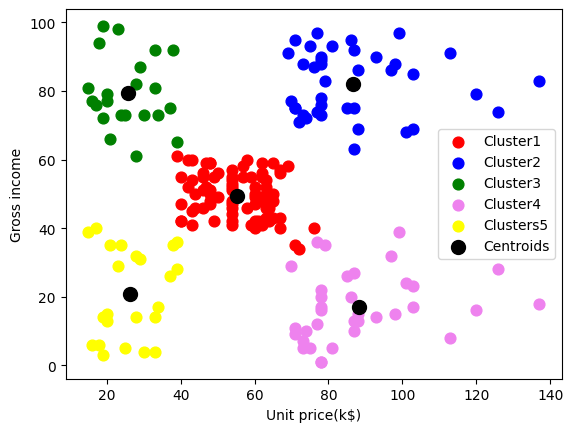

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

df=pd.read_csv("Mall_Customers.csv")
df.head()

features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features].copy()

X = X.fillna(X.mean())

X = df.iloc[:, [3, 4]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans (n_clusters= i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans ==0, 1], s= 60, c = 'red', label ='Cluster1')
plt.scatter(X[y_kmeans== 1, 0], X[y_kmeans ==1, 1], s= 60, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=60, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans== 3, 0], X[y_kmeans== 3, 1],  s = 60,c= 'violet', label = 'Cluster4')
plt.scatter(X[y_kmeans== 4, 0], X[y_kmeans== 4, 1], s=60, c='yellow', label = 'Clusters5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s =100, c ='black', label= 'Centroids')
plt.xlabel('Unit price(k$)')
plt.ylabel('Gross income')
plt.legend()
plt.show()

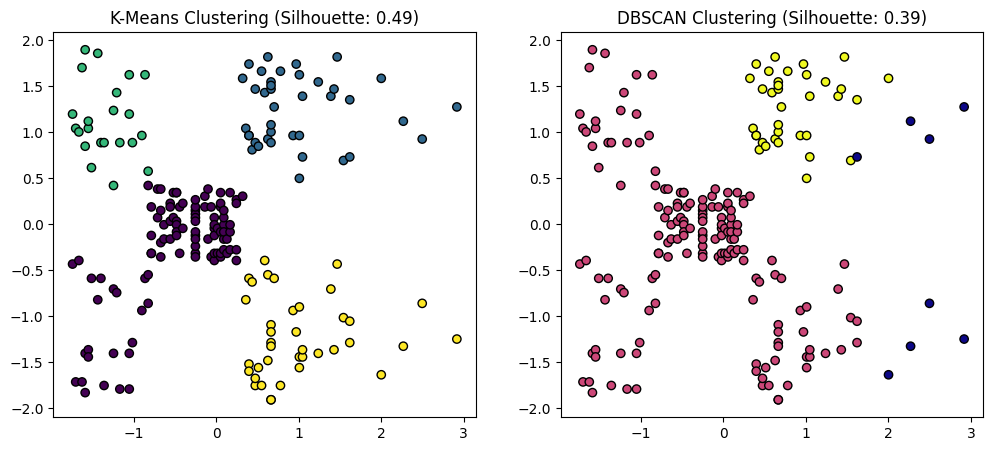

Silhouette Score for K-Means: 0.49434988482196784
Silhouette Score for DBSCAN: 0.3875583892728279
K-Means is better suited for this dataset due to well-defined clusters.


In [2]:
#Bonus assignment
# bonus asssignment 5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('Mall_Customers.csv')  # Replace with actual dataset file
# Updated column names to match the actual column names in the dataframe
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)

# Apply DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Handle noise points labeled as -1 in DBSCAN
core_samples = np.array([label != -1 for label in dbscan_labels])
dbscan_silhouette = silhouette_score(X_scaled[core_samples], dbscan_labels[core_samples]) if np.any(core_samples) else -1

# Plot Clusters
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', marker='o', edgecolor='k')
ax[0].set_title(f'K-Means Clustering (Silhouette: {kmeans_silhouette:.2f})')
ax[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='plasma', marker='o', edgecolor='k')
ax[1].set_title(f'DBSCAN Clustering (Silhouette: {dbscan_silhouette:.2f})')
plt.show()

# Analysis & Recommendations
print("Silhouette Score for K-Means:", kmeans_silhouette)
print("Silhouette Score for DBSCAN:", dbscan_silhouette)

if kmeans_silhouette > dbscan_silhouette:
    print("K-Means is better suited for this dataset due to well-defined clusters.")
else:
    print("DBSCAN is better suited for this dataset due to its ability to detect noise and arbitrary shapes.")